# Bike sharing model evaluation

## Exercise: Load train/test sets

> **Exercise**: Load the train/test sets into the `train_df`/`test_df` DataFrames. Create the x/y Numpy arrays from the `temp` and `users` columns. Plot the data points.

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor

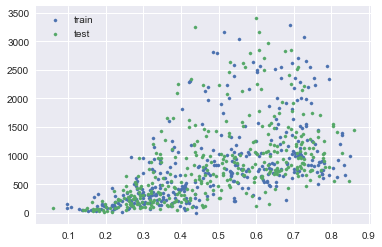

In [38]:
# Load data sets
train_df = pd.read_csv('bike-sharing-train.csv')
test_df = pd.read_csv('bike-sharing-test.csv')

# Create x/y Numpy arrays
x_tr = train_df.temp.values
y_tr = train_df.users.values

x_te = test_df.temp.values
y_te = test_df.users.values

# Plot data points
sns.set()
plt.scatter(x_tr, y_tr, label='train', s=10)
plt.scatter(x_te, y_te, label='test', s=10)
plt.legend(loc='upper left')
plt.show()

 ## Exercise: Fit and compare different models

> **Exercise**: (A) Fit several models to the train data and evaluate their performance on the test set using MAE. (B) Remove the outliers with the z-scores. (C) Create a baseline model and do a final model comparison using a bar chart.

Some ideas: Linear regression, polyfit with different degrees, linear regression with Huber loss, linear regression without outliers, polyfit without outliers.

In [32]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y-y_pred))

In [33]:
# (A) Test different models
coefs_lin = np.polyfit(x_tr, y_tr, deg=1)
y_pred_lin = np.polyval(coefs_lin, x_te)
lin_mae = MAE(y_te, y_pred_lin)

coefs_poly3 = np.polyfit(x_tr, y_tr, deg=3)
y_pred_poly3 = np.polyval(coefs_poly3, x_te)
poly3_mae = MAE(y_te, y_pred_poly3)

lr_huber = SGDRegressor(loss='huber', epsilon=1.1, max_iter=10000)
coefs_hbr = lr_huber.fit(x_tr[:, np.newaxis], y_tr)
y_pred_hbr = lr_huber.predict(x_te[:, np.newaxis])
hbr_mae = MAE (y_te, y_pred_hbr)

In [12]:
# (B) Remove outliers
z_scores = (y_tr - y_tr.mean()) / y_tr.std()

idx = z_scores>2
idx[idx]

x1_tr, y1_tr = x_tr[~idx], y_tr[~idx]

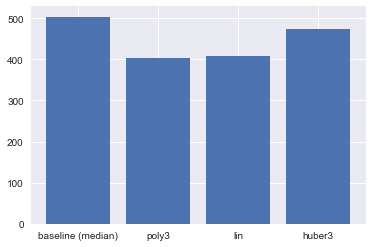

In [34]:
# (C) Final comparison
dummy = DummyRegressor(strategy='median')
dummy.fit(x_tr[:, np.newaxis], y_tr)
pred_baseline = dummy.predict(x_te[:, np.newaxis])

mae_baseline = MAE(y_te, pred_baseline)

plt.bar([1, 2, 3, 4], [mae_baseline, poly3_mae, lin_mae, hbr_mae])
plt.xticks([1, 2, 3, 4], ['baseline (median)', 'poly3', 'lin', 'huber'])
plt.show()
